In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

newmort = pd.read_csv('../data/data.csv', header=0) # 새로운 DATA
mort = pd.read_csv('../data/data.csv', header=0) # 추가 DATA
mort.head()

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Status,OUTCOME,State,Median_state_inc,UPB>Appraisal
0,37,75650.0,85,669,N,1707,6000,169000,160000,0.284500,Active,non-default,FL,"40,171",0
1,46,390775.0,102,684,N,0,5025,310000,309000,0.000000,Pay-off,non-default,NY,"44,228",1
2,30,112500.0,90,662,Y,1812,4800,177000,176450,0.377500,Pay-off,non-default,CA,"49,894",0
3,24,85250.0,97,647,N,3395,6934,113000,110000,0.489616,Pay-off,non-default,GA,"43,217",0
4,35,114000.0,100,791,N,3801,5504,103000,103000,0.690589,Pay-off,non-default,NH,"57,352",1


c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


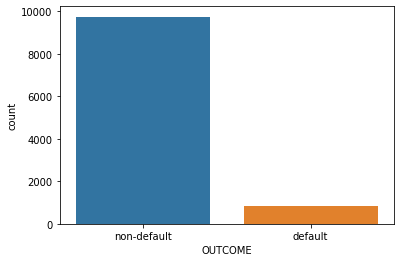

In [2]:
### 새로운 DATA set 만들기
for c in range(0,10607):
    if newmort['Credit_score'][c] < 620 and newmort['Orig_LTV_Ratio_Pct'][c] > 75 and newmort['DTI Ratio'][c] > 0.43:
        newmort['OUTCOME'][c] = 'default'

import seaborn as sns

sns.countplot(newmort['OUTCOME'])

## 새로운 DATA

In [3]:
### 새로운 DATA set 만들기
for c in range(0,10607):
    if newmort['Credit_score'][c] < 620 and newmort['Orig_LTV_Ratio_Pct'][c] > 75 and newmort['DTI Ratio'][c] > 0.43:
        newmort['OUTCOME'][c] = 'default'

### 전처리 과정
## First_home 문자형 데이터 변환
newmort['First_home'] = np.where(newmort['First_home']=='Y',1,0)

## OUTCOME 데이터 변환
newmort['OUTCOME'] = np.where(newmort['OUTCOME']=='non-default',0,1) # non-default = 0, default = 1

## string 타입을 정수로 변환
for k in range(0,10607):
    newmort.Median_state_inc[k] = np.float64(newmort.Median_state_inc[k].replace(",", ""))
    
## Separating 'target' feature
newoutcome = newmort.OUTCOME
newmort.drop(['OUTCOME'], axis='columns', inplace=True)

## Delete feature
newmort = newmort.drop('Status', axis=1)
newmort = newmort.drop('State', axis=1)
newmort = newmort.drop('orig_apprd_val_amt', axis=1)
newmort = newmort.drop('UPB>Appraisal', axis=1)
##
# newmort = newmort.drop('Orig_LTV_Ratio_Pct', axis=1)
# newmort = newmort.drop('Credit_score', axis=1)
# newmort = newmort.drop('DTI Ratio', axis=1)

newmort

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,pur_prc_amt,DTI Ratio,Median_state_inc
0,37,75650.0,85,669,0,1707,6000,160000,0.284500,40171
1,46,390775.0,102,684,0,0,5025,309000,0.000000,44228
2,30,112500.0,90,662,1,1812,4800,176450,0.377500,49894
3,24,85250.0,97,647,0,3395,6934,110000,0.489616,43217
4,35,114000.0,100,791,0,3801,5504,103000,0.690589,57352
...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,0.397920,42590
10603,30,57000.0,94,589,0,1703,3941,108000,0.432124,45787
10604,33,153200.0,95,675,1,1726,3707,154000,0.465606,43217
10605,38,158850.0,100,786,1,1364,2500,92000,0.545600,40171


## 추가 DATA

In [4]:
### 추가 DATA set 만들기
mort['Credit'] = np.nan # CS<620 -> 1
mort['LTV'] = np.nan # LTV>75 -> 1
mort['DTI'] = np.nan # DTI>43 -> 1
mort['Total'] = np.nan # cs & ltv & dti -> 1

for i in range(0,10607):
    if mort['Credit_score'][i] > 620:
        mort['Credit'][i] = 0
    else:
        mort['Credit'][i] = 1

for j in range(0,10607):
    if mort['Orig_LTV_Ratio_Pct'][j] > 75:
        mort['LTV'][j] = 1
    else:
        mort['LTV'][j] = 0

for k in range(0,10607):
    if mort['DTI Ratio'][k] > 0.43:
        mort['DTI'][k] = 1
    else:
        mort['DTI'][k] = 0

for l in range(0,10607):
    if mort['Credit'][l] == 1 and mort['LTV'][l] == 1 and mort['DTI'][l] == 1:
        mort['Total'] = 1
    else:
        mort['Total'] = 0

### 전처리 과정
## First_home 문자형 데이터 변환
mort['First_home'] = np.where(mort['First_home']=='Y',1,0)

## OUTCOME 데이터 변환
mort['OUTCOME'] = np.where(mort['OUTCOME']=='non-default',0,1) # non-default = 0, default = 1

## string 타입을 정수로 변환
for k in range(0,10607):
    mort.Median_state_inc[k] = np.float64(mort.Median_state_inc[k].replace(",", ""))
    
## Separating 'target' feature
outcome = mort.OUTCOME
mort.drop(['OUTCOME'], axis='columns', inplace=True)

## Delete feature
mort = mort.drop('Status', axis=1)
mort = mort.drop('State', axis=1)
mort = mort.drop('orig_apprd_val_amt', axis=1)
mort = mort.drop('UPB>Appraisal', axis=1)
##
# mort = mort.drop('Orig_LTV_Ratio_Pct', axis=1)
# mort = mort.drop('Credit_score', axis=1)
# mort = mort.drop('DTI Ratio', axis=1)

mort

c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel 

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,pur_prc_amt,DTI Ratio,Median_state_inc,Credit,LTV,DTI,Total
0,37,75650.0,85,669,0,1707,6000,160000,0.284500,40171,0.0,1.0,0.0,0
1,46,390775.0,102,684,0,0,5025,309000,0.000000,44228,0.0,1.0,0.0,0
2,30,112500.0,90,662,1,1812,4800,176450,0.377500,49894,0.0,1.0,0.0,0
3,24,85250.0,97,647,0,3395,6934,110000,0.489616,43217,0.0,1.0,1.0,0
4,35,114000.0,100,791,0,3801,5504,103000,0.690589,57352,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10602,37,280200.0,95,652,1,727,1827,80000,0.397920,42590,0.0,1.0,0.0,0
10603,30,57000.0,94,589,0,1703,3941,108000,0.432124,45787,1.0,1.0,1.0,0
10604,33,153200.0,95,675,1,1726,3707,154000,0.465606,43217,0.0,1.0,1.0,0
10605,38,158850.0,100,786,1,1364,2500,92000,0.545600,40171,0.0,1.0,1.0,0


## 새로운 DATA 에대한 표준화, 오버샘플링, 특징선택

In [5]:
### 새로운 DATA
## training data와 test data 나누기
from sklearn.model_selection import train_test_split
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(newmort, newoutcome, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train_n)
X_test_n = scaler.transform(X_test_n)

from imblearn.over_sampling import SMOTE
sm_n = SMOTE(ratio='auto', kind='regular')
X_train_n, y_train_n = sm_n.fit_sample(X_train_n, y_train_n)

pd.Series(y_train_n).value_counts()

1    7312
0    7312
dtype: int64

In [6]:
## 특징 선택
from sklearn.feature_selection import SelectKBest, f_classif
selector_n = SelectKBest(f_classif, k = 10).fit(X_train_n, y_train_n)
X_train_n = selector_n.transform(X_train_n)
X_test_n = selector_n.transform(X_test_n)

In [7]:
newmort.columns[selector_n.get_support()]

Index(['Bo_Age', 'Ln_Orig', 'Orig_LTV_Ratio_Pct', 'Credit_score', 'First_home',
       'Tot_mthly_debt_exp', 'Tot_mthly_incm', 'pur_prc_amt', 'DTI Ratio',
       'Median_state_inc'],
      dtype='object')

## 추가 DATA 에대한 표준화, 오버샘플링, 특징선택

In [8]:
### 추가 DATA
## training data와 test data 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mort, outcome, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='auto', kind='regular')
X_train, y_train = sm.fit_sample(X_train, y_train)

pd.Series(y_train).value_counts()

1    7723
0    7723
dtype: int64

In [9]:
## 특징 선택
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 7).fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

c:\anaconda3\envs\dm2019\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [13] are constant.
  UserWarning)
c:\anaconda3\envs\dm2019\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## RandomForest Model 학습

In [10]:
forest_n = RandomForestClassifier(criterion='gini', n_estimators=500, max_leaf_nodes=16, random_state=1) # 새로운 DATA
forest = RandomForestClassifier(criterion='gini', n_estimators=500, max_leaf_nodes=16, random_state=1) # 추가 DATA

forest_n.fit(X_train_n, y_train_n)
forest.fit(X_train, y_train)

pred_n = forest_n.predict(X_test_n)
pred = forest.predict(X_test)

In [11]:
print(classification_report(y_test_n, pred_n))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2439
           1       0.71      0.79      0.75       213

    accuracy                           0.96      2652
   macro avg       0.85      0.88      0.86      2652
weighted avg       0.96      0.96      0.96      2652



In [12]:
confusion_matrix(y_test_n, pred_n)

array([[2370,   69],
       [  44,  169]], dtype=int64)

In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      2602
           1       0.04      0.50      0.07        50

    accuracy                           0.75      2652
   macro avg       0.51      0.63      0.46      2652
weighted avg       0.97      0.75      0.84      2652



In [14]:
confusion_matrix(y_test, pred)

array([[1973,  629],
       [  25,   25]], dtype=int64)

In [16]:
test = pd.read_csv('../data/datatest.csv', header=0)
test_n = pd.read_csv('../data/datatest.csv', header=0)
test

,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,orig_apprd_val_amt,pur_prc_amt,DTI Ratio,Status,State,Median_state_inc,UPB>Appraisal
0,37,83247.0,95,760,Y,1791,3640,167000,164900,0.492033,Active,CO,"51,022",0
1,31,67000.0,100,708,N,1233,4485,155000,67000,0.274916,Active,WI,"47,220",0
2,44,226900.0,100,656,Y,1497,3146,107300,109900,0.475842,Pay-off,VA,"53,275",1
3,27,77500.0,100,747,Y,2563,5832,170000,167900,0.439472,Active,TX,"41,275",0
4,28,100000.0,100,544,N,975,4669,170000,154250,0.208824,Pay-off,FL,"40,171",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,49,211638.0,102,625,N,1701,3033,140000,139725,0.560831,Pay-off,GA,"43,217",1
4542,37,99200.0,80,661,N,1446,3481,147000,144000,0.415398,Pay-off,SC,"39,326",0
4543,36,136400.0,99,650,Y,2990,5876,183000,170000,0.508850,Pay-off,FL,"40,171",0
4544,46,29900.0,100,562,N,2854,7830,185000,185000,0.364496,Default,IN,"43,003",0


In [18]:
val = len(test)

### 전처리 과정
## First_home 문자형 데이터 변환
test['First_home'] = np.where(test['First_home']=='Y',1,0)

## string 타입을 정수로 변환
for k in range(0,val):
    test.Median_state_inc[k] = np.float64(test.Median_state_inc[k].replace(",", ""))

## Delete feature
test = test.drop('Status', axis=1)
test = test.drop('State', axis=1)
test = test.drop('orig_apprd_val_amt', axis=1)
test = test.drop('UPB>Appraisal', axis=1)

test

c:\anaconda3\envs\dm2019\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
c:\anaconda3\envs\dm2019\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Bo_Age,Ln_Orig,Orig_LTV_Ratio_Pct,Credit_score,First_home,Tot_mthly_debt_exp,Tot_mthly_incm,pur_prc_amt,DTI Ratio,Median_state_inc
0,37,83247.0,95,760,0,1791,3640,164900,0.492033,51022
1,31,67000.0,100,708,0,1233,4485,67000,0.274916,47220
2,44,226900.0,100,656,0,1497,3146,109900,0.475842,53275
3,27,77500.0,100,747,0,2563,5832,167900,0.439472,41275
4,28,100000.0,100,544,0,975,4669,154250,0.208824,40171
...,...,...,...,...,...,...,...,...,...,...
4541,49,211638.0,102,625,0,1701,3033,139725,0.560831,43217
4542,37,99200.0,80,661,0,1446,3481,144000,0.415398,39326
4543,36,136400.0,99,650,0,2990,5876,170000,0.508850,40171
4544,46,29900.0,100,562,0,2854,7830,185000,0.364496,43003


In [ ]:
pred_test = forest.predict(test)